In [1]:
from xraycam.nbinit import *
camcontrol.set_detector('zwo')
from xraycam.camalysis import *

Process Process-2:
Traceback (most recent call last):
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/multiprocess-0.70.4-py3.5-linux-x86_64.egg/multiprocess/process.py", line 254, in _bootstrap
    self.run()
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/multiprocess-0.70.4-py3.5-linux-x86_64.egg/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/xraycam-0.0.0-py3.5.egg/xraycam/zwo.py", line 85, in sink_process
    zmq_comm.start_sink_routine(sink_function)
  File "/home/xrayslaptippitytop/.local/lib/python3.5/site-packages/xraycam-0.0.0-py3.5.egg/xraycam/zmq_comm.py", line 82, in start_sink_routine
    receiver.bind(sink_addr)
  File "zmq/backend/cython/socket.pyx", line 487, in zmq.backend.cython.socket.Socket.bind (zmq/backend/cython/socket.c:5156)
  File "zmq/backend/cython/checkrc.pxd", line 25, in zmq.backend.cython.checkrc._check_rc 

In [2]:
class Monitor:
    def __init__(self, *args, transpose = True, vmax = 150, rebin = 1, **kwargs):
        self.run = camcontrol.DataRun(*args, **kwargs)
        self.vmax = vmax
        self.rebin = rebin

    def frame(self):
        return self.run.get_frame()
    
    def update(self):
        self.run.show(vmax = self.vmax)
        self.run.plot_lineout(rebin = self.rebin)
        self.frame().plot_histogram(xmin = 0, xmax = self.vmax)
        
    def stop(self):
        self.run.stop()

#### code for runset arrays

In [3]:
from xraycam.camcontrol import _rebin_spectrum

In [4]:
def rebin_spc(arr2d,rebin=5):
    lineout = np.sum(arr2d,axis=0)/110
    return _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]

In [5]:
def _reorient_array(arr2d):
    """Take output from the get_array() method for dataruns from the new camera,
    and reorient them to match what our usual analysis code expects."""
    return np.transpose(arr2d[::,::-1])

NOTe to self Will: you changed the fitregionx on the below function definition because center_of_masses was throwing NaN

fitregionmode='man',fitregionx=[500,800]

In [6]:
def plot_with_energy_scale_arr2d(arr2d,known_energy,photon_value=110,yrange=[0,-1],xrange=[0,-1],rebin=1,show=True,peaknormalize=False, label=None,calcfwhm=False,parabolic=False,**kwargs):
    if parabolic == False:
        lineout = np.sum(arr2d[yrange[0]:yrange[1],xrange[0]:xrange[1]],axis=0)/photon_value
    else:
        lineout = get_parabolic_lineout(arr2d,yrange=yrange)[xrange[0]:xrange[1]]/photon_value
    if rebin != 1: #rebin using oliver's rebin_spectrum function
        lineout = _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]
    if peaknormalize == True:
        lineout = lineout / max(lineout)
    lineout_energyscale=add_energy_scale(lineout,known_energy,rebinparam=rebin,**kwargs)
    if label == None and calcfwhm == False:
        label=datarun.prefix
    elif label == None and calcfwhm == True:
        s=' - '
        label=s.join((str(datarun.prefix),str(fwhm_ev(lineout_energyscale,3))))
    elif label != None and calcfwhm == True:
        s=' - '
        label=s.join((label,str(fwhm_ev(lineout_energyscale))))
    camcontrol.plt.plot(*lineout_energyscale,label=label)
    if show == True:
        camcontrol.plt.show()

In [7]:
def plot_with_energy_scale_arr2d_gap(arr2d,known_energy,photon_value=110,yrange=[0,-1],xrange=[0,-1],rebin=1,show=True,peaknormalize=False, label=None,calcfwhm=False,parabolic=False,**kwargs):
    if parabolic == False:
        lineout = np.sum(arr2d[yrange[0]:yrange[1],xrange[0]:xrange[1]],axis=0)/photon_value
    else:
        lineout = get_parabolic_lineout(arr2d,yrange=yrange,fitregionmode='man',fitregionx=[620-150,620+150])[xrange[0]:xrange[1]]/photon_value
    if rebin != 1: #rebin using oliver's rebin_spectrum function
        lineout = _rebin_spectrum(np.array(range(len(lineout))),lineout,rebin)[1]
    if peaknormalize == True:
        lineout = lineout / max(lineout)
    lineout_energyscale=add_energy_scale(lineout,known_energy,rebinparam=rebin,**kwargs)
    if label == None and calcfwhm == False:
        label=datarun.prefix
    elif label == None and calcfwhm == True:
        s=' - '
        label=s.join((str(datarun.prefix),str(fwhm_ev(lineout_energyscale,3))))
    elif label != None and calcfwhm == True:
        s=' - '
        label=s.join((label,str(fwhm_ev(lineout_energyscale))))
    camcontrol.plt.plot(*lineout_energyscale,label=label)
    if show == True:
        camcontrol.plt.show()

In [8]:
def cropping_tool_arr2d(datarun,step,known_energy=2014,calcfwhm=True,**kwargs):
    [plot_with_energy_scale_arr2d(datarun,known_energy,label='['+','.join((str(i),str(i+step)))+']',yrange=[i,i+step],
                            show=False,calcfwhm=calcfwhm,**kwargs) for i in range(0,2000,step)]
    camcontrol.plt.show()

### Still at pre-edge 2151.5 eV, checking count rates
* He flow set at 0.25

In [3]:
lifepo0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.lifepo0')

* He flow set at 0.5

In [17]:
lifepo1 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.lifepo1')

In [25]:
lifepo1.stop()

In [26]:
[x.run.counts_per_second() for x in (lifepo0,lifepo1)]

[1.1738555587986896, 1.1914633509349801]

In [27]:
_ = lifepo1.run.plot_lineout(rebin=5)

In [16]:
lifepo0.stop()

# Switching to nonresonant XES on LiFePO4
* 3keV, tuned beam for higher flux

In [28]:
nxeslifepo0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.nxeslifepo0')

In [42]:
nxeslifepo0.stop()

In [44]:
nxeslifepo0.run.acquisition_time()

124.43913102149963

In [45]:
_ = nxeslifepo0.run.plot_lineout(rebin=5)

note the mislabel below, this was run on 9.22

In [9]:
nxeslifepo0runset = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.nxeslifepo0runset',htime="5m",number_runs=12)

Loaded from cache.


In [10]:
nxeslifepo1runset = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.21.nxeslifepo1runset',htime="5m",number_runs=12)

Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.
Loaded from cache.


In [14]:
np.mean([nxeslifepo0runset.dataruns[i].counts_per_second() for i in (0,1,2,3,5,6,7,8,9,10,11)])

5.6090228173541732

In [13]:
np.mean([x.counts_per_second() for x in nxeslifepo1runset.dataruns])

5.5547646379800204

note about nxesarr0: computer crashed during exposure 4, so we restarted and went to nxesarr1, then restarted nxesarr0 to finisht the run

In [183]:
nxesarr0=_reorient_array(np.sum([nxeslifepo0runset.dataruns[i].get_array() for i in (0,1,2,3,5,6,7,8,9,10,11)],axis=0))

In [184]:
nxesarr1=_reorient_array(np.sum([x.get_array() for x in nxeslifepo1runset.dataruns],axis=0))

In [185]:
nxestotal=nxesarr0+nxesarr1

In [186]:
plot_with_energy_scale_arr2d(nxestotal,2015,known_bin=736,label="LiFePO4-nxes",parabolic=False,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=False)
plot_with_energy_scale_arr2d(nxestotal,2015,known_bin=736,label="LiFePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=True,peaknormalize=False)
plt.show()

<IPython.core.display.Javascript object>


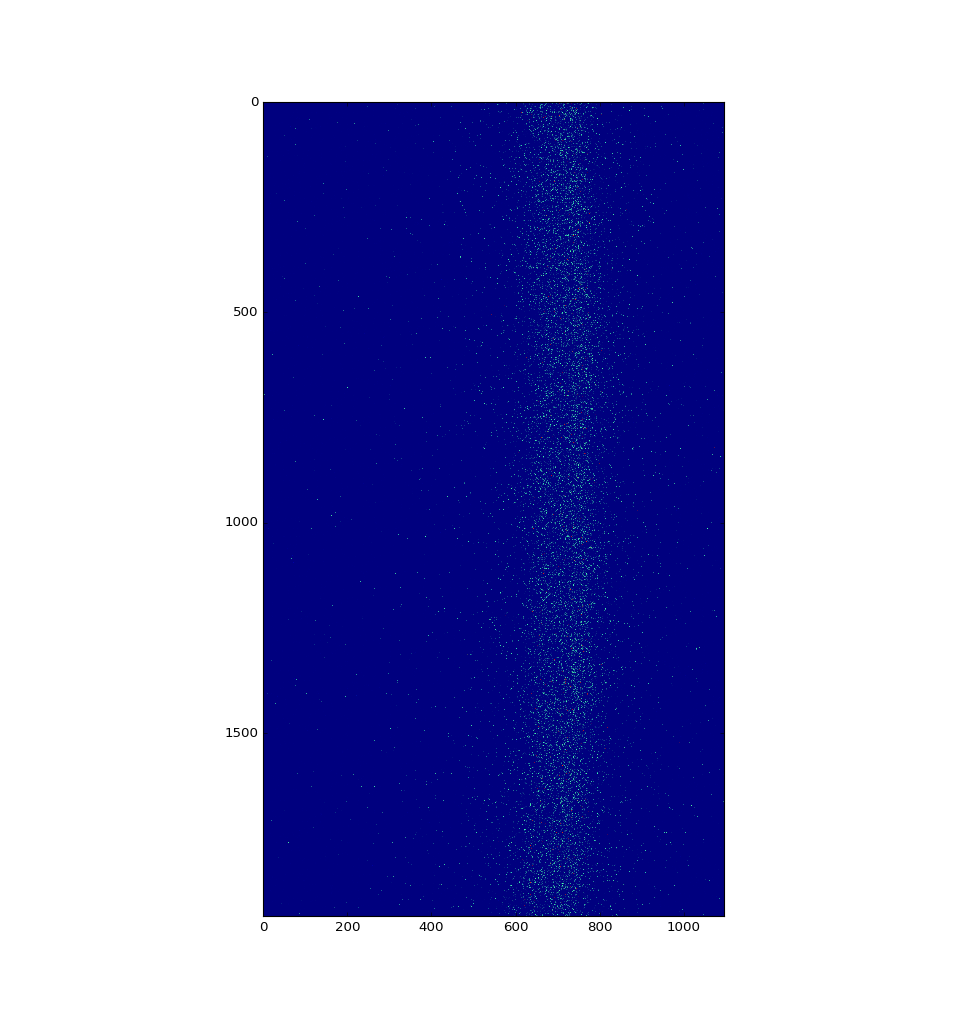

In [123]:
plt.imshow(nxestotal,vmax=250)
plt.show()

In [149]:
cropping_tool_arr2d(nxestotal,400,calcfwhm=False,rebin=8)

In [145]:
cmplot(nxestotal,smooth=5)

# Switching to nonresonant XES on FePO4
* 3keV, tuned beam for higher flux

In [187]:
fepoangle0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.fepoangle0')
fepoangle0.run.theta=125

In [194]:
fepoangle0.run.counts_per_second()

8.5719817793907858

In [195]:
fepoangle0.stop()

In [196]:
nxesfepo0 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.22.nxesfepo0',htime="5m",number_runs=6)

starting acquisition


In [238]:
nxesfepo1 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.22.nxesfepo1',htime="5m",number_runs=6)

starting acquisition


In [278]:
nxesfepo2 = camcontrol.RunSet(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            prefix = '9.22.nxesfepo2',htime="5m",number_runs=6)

starting acquisition


In [314]:
[x.counts_per_second() for x in nxesfepo2.dataruns]

[9.2941989980194677,
 11.054604900754985,
 10.975595392394272,
 11.405102225465932,
 9.8033370767660326,
 11.015029792700405]

In [315]:
[x.acquisition_time() for x in nxesfepo2.dataruns]

[300.1608364582062,
 300.231938123703,
 300.17754435539246,
 300.2531774044037,
 300.21409821510315,
 300.2599892616272]

In [269]:
fepoarr0=_reorient_array(np.sum([x.get_array() for x in nxesfepo0.dataruns],axis=0))

In [273]:
fepoarr1=_reorient_array(np.sum([x.get_array() for x in nxesfepo1.dataruns],axis=0))

In [311]:
fepoarr2=_reorient_array(np.sum([x.get_array() for x in nxesfepo2.dataruns],axis=0))

In [312]:
fepoarrtotal=fepoarr2+fepoarr1+fepoarr0

In [296]:
cmplot(fepoarrtotal,smooth=5)
cmplot(nxestotal,smooth=5)

stopped acquisistion
starting acquisition


# GaP nonresonant XES for E-scale calibration

In [316]:
gap0 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.gap0')
gap0.run.theta=305

shoot and a miss

In [326]:
gap1 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.gap1')
gap1.run.theta=315

adjust helium flow, try again

In [336]:
gap2 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.gap2')
gap2.run.theta=315

oops, helium valve to chamber was closed

In [344]:
gap3 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.gap3')
gap3.run.theta=315

change angle, run again

In [352]:
gap4 = Monitor(threshold = 2, window_min = 104, window_max = 114, photon_value = 110,
            run_prefix = '9.22.gap4')
gap4.run.theta=305

In [410]:
gap4.stop()

In [403]:
gap4.run.counts_per_second()

7.629902112652311

In [409]:
gap4.run.acquisition_time()

3035.62207698822

In [371]:
_ = gap4.run.plot_lineout(rebin=5)

In [411]:
plot_with_energy_scale_arr2d(fepoarrtotal,2015,known_bin=736,label="FePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d(nxestotal,2015,known_bin=736,label="LiFePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale(gap4.run,2015,known_bin=736,label="GaP-nxes",parabolic=False,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d_gap(_reorient_array(gap4.run.get_array()),2015,known_bin=736,label="GaP-nxes-para",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plt.show()

EXPORTED below plot to Plotly

In [415]:
plot_with_energy_scale_arr2d(fepoarrtotal,2015,known_bin=736,label="FePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d(nxestotal,2015,known_bin=736,label="LiFePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale(gap4.run,2015,known_bin=736,label="GaP-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plt.show()

In [389]:
plot_with_energy_scale_arr2d(fepoarrtotal,2015,known_bin=None,label="FePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d(nxestotal,2015,known_bin=None,label="LiFePO4-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plot_with_energy_scale_arr2d_gap(_reorient_array(gap4.run.get_array()),2015,known_bin=None,label="GaP-nxes",parabolic=True,rebin=5,yrange=[0,-1],show=False,calcfwhm=False,peaknormalize=True)
plt.show()

getting rid of nan's to do parabolic fit of GaP

In [381]:
np.mean(center_of_masses(_reorient_array(gap4.run.get_array()))[~np.isnan(center_of_masses(_reorient_array(gap4.run.get_array())))])

621.02865697906293